### Problem Statement : We are a consultancy firm, Investopedia, hired by Pennywise who are looking forward to invest in cryptocurrency in 2018. We are hired to give them some insights about the market sentiment and help them in making a model to predict the prices of Bitcoin, Ripple and Ethereum.

#### Importing Python libraries:

In [1]:
import pandas as pd
import numpy as np
import nltk
import csv
import itertools
from operator import itemgetter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing, cross_validation, svm

C:\Users\Bhakti\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Financial News Sentiment Analysis :

In [2]:
df = pd.read_csv('News_train_data.csv')

In [3]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(df['Top1'].values)

In [4]:
classifierModel = MultinomialNB()

In [5]:
targets = df['Label'].values
classifierModel.fit(counts, targets)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [6]:
df1=pd.read_csv('News_test_data1.csv')

In [7]:
df1['Label'] = vectorizer.transform(df1['News'])

In [8]:
df1['Label'] = classifierModel.predict(vectorizer.transform(df1['News']))

#### Code to manipulate Date Format (Common Date Format required to merge files):

In [9]:
df1['Date'] = df1['Date'].map(lambda x : x[4] + x[5] +'-' + x[0]+x[1]+x[2] + '-'+ x[10] + x[11] if x[5]!=',' else x[4] +'-' + x[0]+x[1]+x[2] + '-'+ x[9] + x[10])

##### Code to obtain csv with news date and labels (positive or negative)

In [10]:
df1.drop(df1.columns.difference(['Date','News','Label']), 1, inplace=True)

In [11]:
df1.to_csv('news_sentiment.csv')

#### Group the news according to date and get the count of positive/negative Sentiments:

In [12]:
df1=df1.sort_values(by='Date')

In [13]:
df2=df1.groupby(['Date','Label'], as_index=False).count()

In [14]:
df2 = df2.pivot_table(values='News',index='Date',columns='Label')

#### Data stored in CSV format:

In [15]:
df2.to_csv('Sentiment_NaiveB.csv')

#### Prediction of BTC:

In [16]:
btc_file = pd.read_csv('bitcoin_data.csv')

In [17]:
news_sentiment =pd.read_csv('Sentiment_NaiveB.csv')

In [18]:
btc_merged=pd.merge(left=btc_file,right=news_sentiment,left_on='Date',right_on='Date', how='left')

In [19]:
btc_merged.rename(columns={'0':'Negative', '1': 'Positive'},inplace=True)

In [20]:
btc_merged=btc_merged.fillna(0)

In [21]:
btc_merged['Avg']= (btc_merged['High'] + btc_merged['Low'] + btc_merged['Close'] + btc_merged['Open'])/4

In [22]:
btc_merged['Date'] =btc_merged['Date'] .astype(str)
btc_merged['Date'] = btc_merged['Date'].str.replace('/', '')

In [23]:
btc_merged=btc_merged.drop(['Name','High','Low','Open','Close'],axis=1)

In [24]:
btc_merged['Volume'] = btc_merged['Volume'].str.replace(',', '')

In [25]:
btc_merged['Market Cap'] = btc_merged['Market Cap'].str.replace(',', '')

#### Data Normalization: 

In [26]:
btc_merged['Volume']=btc_merged['Volume'].astype(float)
btc_merged['Market Cap']=btc_merged['Market Cap'].astype(float)
btc_merged['Avg']=btc_merged['Avg'].astype(float)
btc_merged['Date']=btc_merged['Date'].astype(float)
vol_mean=np.mean(btc_merged['Volume'])
vol_std=np.std(btc_merged['Volume'])
market_mean=np.mean(btc_merged['Market Cap'])
market_std=np.std(btc_merged['Market Cap'])
avg_mean=np.mean(btc_merged['Avg'])
avg_std=np.std(btc_merged['Avg'])
date_mean=np.mean(btc_merged['Date'])
date_std=np.std(btc_merged['Date'])
btc_merged['Volume']=btc_merged.Volume.map(lambda x: (x-vol_mean)/vol_std)
btc_merged['Market Cap']=btc_merged['Market Cap'].map(lambda x: (x-market_mean)/market_std)
btc_merged['Avg']=btc_merged['Avg'].map(lambda x: (x-avg_mean)/avg_std)
btc_merged['Date']=btc_merged['Date'].map(lambda x: (x-date_mean)/date_std)

In [27]:
btc_merged.to_csv('normalized_btc')

#### Training the BTC Model and it's accuracy:

In [28]:
X_btc=np.array(btc_merged.drop(['Avg'],1))
y_btc=np.array(btc_merged['Avg'])
X_btc_train, X_btc_test, y_btc_train, y_btc_test = cross_validation.train_test_split (X_btc,y_btc,test_size =.2)
btc_model=svm.SVR()
btc_model.fit(X_btc_train,y_btc_train)
prediction_btc=btc_model.predict(X_btc_test)
accuracy=btc_model.score(X_btc_test,y_btc_test)
print(accuracy)

0.994795700062


In [29]:
arr=[1,2,3,4,5,6,7,8,9,10]
prediction_btc= (prediction_btc*avg_std) + avg_mean
y_btc_test=(y_btc_test*avg_std) + avg_mean

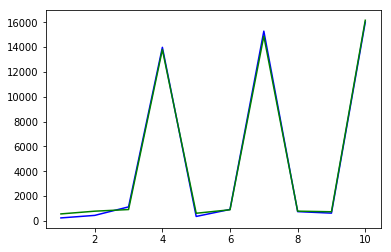

In [30]:
import matplotlib.pyplot as matplt
matplt.plot(arr,y_btc_test[-10:],color='blue')
matplt.plot(arr,prediction_btc[-10:],color='green')
matplt.show()

#### Prediction of Ripple:

In [31]:
ripple_file = pd.read_csv('ripple_data.csv')

In [32]:
rip_merged=pd.merge(left=ripple_file,right=news_sentiment,left_on='Date',right_on='Date', how='left')

In [33]:
rip_merged.rename(columns={'0':'Negative', '1': 'Positive'},inplace=True)

In [34]:
rip_merged=rip_merged.fillna(0)

In [35]:
rip_merged['Avg']= (rip_merged['High'] + rip_merged['Low'] + rip_merged['Close'] + rip_merged['Open'])/4

In [36]:
rip_merged=rip_merged.drop(['Name','High','Low','Open','Close'],axis=1)

In [37]:
rip_merged['Date'] =rip_merged['Date'] .astype(str)
rip_merged['Date'] = rip_merged['Date'].str.replace('/', '')

In [38]:
rip_merged['Volume'] = rip_merged['Volume'].str.replace(',', '')

In [39]:
rip_merged['Market Cap'] = rip_merged['Market Cap'].str.replace(',', '')

#### Data Normalization: 

In [40]:
rip_merged['Volume']=rip_merged['Volume'].astype(float)
rip_merged['Market Cap']=rip_merged['Market Cap'].astype(float)
rip_merged['Avg']=rip_merged['Avg'].astype(float)
rip_merged['Date']=rip_merged['Date'].astype(float)
vol_mean=np.mean(rip_merged['Volume'])
vol_std=np.std(rip_merged['Volume'])
market_mean=np.mean(rip_merged['Market Cap'])
market_std=np.std(rip_merged['Market Cap'])
avg_mean=np.mean(rip_merged['Avg'])
avg_std=np.std(rip_merged['Avg'])
date_mean=np.mean(rip_merged['Date'])
date_std=np.std(rip_merged['Date'])
rip_merged['Volume']=rip_merged.Volume.map(lambda x: (x-vol_mean)/vol_std)
rip_merged['Market Cap']=rip_merged['Market Cap'].map(lambda x: (x-market_mean)/market_std)
rip_merged['Avg']=rip_merged['Avg'].map(lambda x: (x-avg_mean)/avg_std)
rip_merged['Date']=rip_merged['Date'].map(lambda x: (x-date_mean)/date_std)

In [41]:
rip_merged.to_csv('normalized_rip')

#### Training the Ripple Model and it's accuracy:

In [42]:
X_rip=np.array(rip_merged.drop(['Avg'],1))
y_rip=np.array(rip_merged['Avg'])
X_rip_train, X_rip_test, y_rip_train, y_rip_test = cross_validation.train_test_split (X_rip,y_rip,test_size =.2)
rip_model=svm.SVR()
rip_model.fit(X_rip_train,y_rip_train)
prediction_rip=rip_model.predict(X_rip_test)
accuracy_rip=rip_model.score(X_rip_test,y_rip_test)
print(accuracy_rip)

0.975167355589


In [43]:
prediction_rip= (prediction_rip*avg_std) + avg_mean
y_rip_test=(y_rip_test*avg_std) + avg_mean

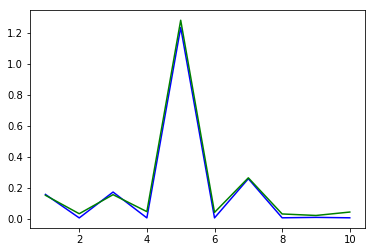

In [44]:
import matplotlib.pyplot as matplt
matplt.plot(arr,y_rip_test[-10:],color='blue')
matplt.plot(arr,prediction_rip[-10:],color='green')
matplt.show()

#### Prediction of Ethereum:

In [45]:
ethereum_file = pd.read_csv('ethereum_data.csv')

In [46]:
eth_merged=pd.merge(left=ethereum_file,right=news_sentiment,left_on='Date',right_on='Date', how='left')

In [47]:
eth_merged.rename(columns={'0':'Negative', '1': 'Positive'},inplace=True)

In [48]:
eth_merged=eth_merged.fillna(0)

In [49]:
eth_merged['Avg']= (eth_merged['High'] + eth_merged['Low'] + eth_merged['Close'] + eth_merged['Open'])/4

In [50]:
eth_merged=eth_merged.drop(['Name','High','Low','Open','Close'],axis=1)

In [51]:
eth_merged['Date'] = eth_merged['Date'].map(lambda x : x[0] + x[1] + x[3]+x[4]+x[6] + x[7])

In [52]:
eth_merged['Volume'] = eth_merged['Volume'].str.replace(',', '')

In [53]:
eth_merged['Market Cap'] = eth_merged['Market Cap'].str.replace(',', '')

In [54]:
eth_merged['Date'] =eth_merged['Date'] .astype(str)

In [55]:
eth_merged['Date'] = eth_merged['Date'].str.replace('/', '')

#### Data Normalization: 

In [56]:
eth_merged['Volume']=eth_merged['Volume'].astype(float)
eth_merged['Market Cap']=eth_merged['Market Cap'].astype(float)
eth_merged['Avg']=eth_merged['Avg'].astype(float)
eth_merged['Date']=eth_merged['Date'].astype(float)
vol_mean=np.mean(eth_merged['Volume'])
vol_std=np.std(eth_merged['Volume'])
market_mean=np.mean(eth_merged['Market Cap'])
market_std=np.std(eth_merged['Market Cap'])
avg_mean=np.mean(eth_merged['Avg'])
avg_std=np.std(eth_merged['Avg'])
date_mean=np.mean(eth_merged['Date'])
date_std=np.std(eth_merged['Date'])
eth_merged['Volume']=eth_merged.Volume.map(lambda x: (x-vol_mean)/vol_std)
eth_merged['Market Cap']=eth_merged['Market Cap'].map(lambda x: (x-market_mean)/market_std)
eth_merged['Avg']=eth_merged['Avg'].map(lambda x: (x-avg_mean)/avg_std)
eth_merged['Date']=eth_merged['Date'].map(lambda x: (x-date_mean)/date_std)

In [57]:
eth_merged.to_csv('normalized_eth')

#### Training the Ethereum Model and it's accuracy:

In [58]:
X_eth=np.array(eth_merged.drop(['Avg'],1))
y_eth=np.array(eth_merged['Avg'])
X_eth_train, X_eth_test, y_eth_train, y_eth_test = cross_validation.train_test_split (X_eth,y_eth,test_size =.2)
eth_model=svm.SVR()
eth_model.fit(X_eth_train,y_eth_train)
prediction_eth=eth_model.predict(X_eth_test)
accuracy=eth_model.score(X_eth_test,y_eth_test)
print(accuracy)

0.994709733709


In [59]:
prediction_eth= (prediction_eth*avg_std) + avg_mean
y_eth_test=(y_eth_test*avg_std) + avg_mean

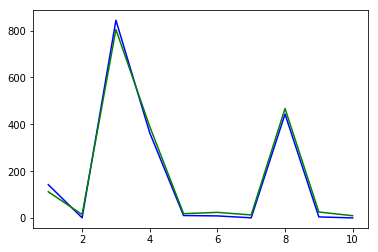

In [60]:
import matplotlib.pyplot as matplt
matplt.plot(arr,y_eth_test[-10:],color='blue')
matplt.plot(arr,prediction_eth[-10:],color='green')
matplt.show()